In [1]:
pip install geopy # This librarie is installed to use the nominatim service 

# **Import the required libraries**

In [0]:
# Import the required libraries
import numpy as np
import pandas as pd

# **Get the data from the json file**

In [3]:
# Get the geojson that contain the data of all neighborhoods in Algeria,
# and put that in a DataFrame df
df = pd.read_json (r'communes_lat_long.json')
df

,longitude,latitude,nom,id,wilaya_id,code_postal
0,-0.186964,27.971634,Adrar,1,1,1001
1,-0.245748,27.425724,Tamest,2,1,1002
2,-0.259657,29.019557,Charouine,3,1,1003
3,-1.520862,25.275963,Reggane,4,1,1004
4,1.486986,26.936237,Tit,6,1,1006
...,...,...,...,...,...,...
1447,0.683235,35.699165,Dar Ben Abdellah,1535,48,48032
1448,-0.661822,35.689587,El Hassi,1536,48,48033
1449,1.148497,35.679252,Had Echkalla,1537,48,48034
1450,0.518694,35.715003,Bendaoud,1538,48,48035


In [4]:
# Select only the neighborhoods in Algiers in which we are going  to make our study,
# So we get 56 neighborhoods
Alger_neighborhoods = df[df['wilaya_id'] == 16].reset_index(drop=True)
Alger_neighborhoods

,longitude,latitude,nom,id,wilaya_id,code_postal
0,3.055116,36.772484,Alger Centre,554,16,16001
1,3.058756,36.753768,Sidi Mhamed,555,16,16002
2,3.068890,36.741179,El Madania,556,16,16003
3,3.078123,36.750963,Hamma Anassers,557,16,16004
4,3.051360,36.792759,Bab El Oued,558,16,16005
5,3.043340,36.803713,Bologhine Ibn Ziri,559,16,16006
6,3.058872,36.784496,Casbah,560,16,16007
7,3.040094,36.783631,Oued Koriche,561,16,16008
8,3.050374,36.735349,Bir Mourad Rais,562,16,16009
9,3.030995,36.769009,El Biar,563,16,16010


In [5]:
# Make the features selection and let only the 'name, latitude, and longitude' columns in our
# Alger_neighborhoods dataframe 
Alger_neighborhoods = Alger_neighborhoods[['nom', 'latitude', 'longitude']]
Alger_neighborhoods

,nom,latitude,longitude
0,Alger Centre,36.772484,3.055116
1,Sidi Mhamed,36.753768,3.058756
2,El Madania,36.741179,3.068890
3,Hamma Anassers,36.750963,3.078123
4,Bab El Oued,36.792759,3.051360
5,Bologhine Ibn Ziri,36.803713,3.043340
6,Casbah,36.784496,3.058872
7,Oued Koriche,36.783631,3.040094
8,Bir Mourad Rais,36.735349,3.050374
9,El Biar,36.769009,3.030995


In [13]:
# Importing libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# **Start working with the Foursquare API**

In [7]:
# Working with Foursquare
CLIENT_ID = 'TDFMBZKEDDVHQJ1YEVN2HMDXRPL0YCKSWDHATTQFCGEGQTWU' # my Foursquare ID
CLIENT_SECRET = 'AQPJSM0MY4J5PESQEAHJIYOYQCBV22I2FCGQF1ZKWTGVYJIB' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: TDFMBZKEDDVHQJ1YEVN2HMDXRPL0YCKSWDHATTQFCGEGQTWU
CLIENT_SECRET:AQPJSM0MY4J5PESQEAHJIYOYQCBV22I2FCGQF1ZKWTGVYJIB


In [0]:
# Create the function that use the Foursquare API to get the venues of a neighborhood
# by using as imputs the latitude and longitude of the neighborhood and the radius where to search,
# This function will return a dataframe that contain all venues in each neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=100'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [111]:
# Apply the function created and return the result in 'alger_venues' variable

alger_venues=getNearbyVenues(Alger_neighborhoods['nom'], Alger_neighborhoods['latitude'], Alger_neighborhoods['longitude'])
alger_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alger Centre,36.772484,3.055116,Restaurant Le Thyrolien,36.775188,3.058731,BBQ Joint
1,Alger Centre,36.772484,3.055116,Hotel El Aurassi,36.776035,3.051442,Hotel
2,Alger Centre,36.772484,3.055116,CARACOYA,36.766672,3.053610,French Restaurant
3,Alger Centre,36.772484,3.055116,Panoramic Lounge,36.776056,3.051477,Lounge
4,Alger Centre,36.772484,3.055116,Musée d'Art Moderne Algérie,36.777203,3.058273,Art Museum
5,Alger Centre,36.772484,3.055116,El Daqdaq,36.776226,3.051451,Restaurant
6,Alger Centre,36.772484,3.055116,Milk Bar,36.776050,3.058229,Café
7,Alger Centre,36.772484,3.055116,à la bonne heure,36.770336,3.055920,Café
8,Alger Centre,36.772484,3.055116,venezia,36.770756,3.056214,Café
9,Alger Centre,36.772484,3.055116,Albert 1er Hotel,36.773267,3.058248,Hotel


In [112]:
alger_venues.shape

(152, 7)

# **Data exploratory and analysis**

In [113]:
# Calcule the number of venues in each neighborhood and sort the result by descending order

alger_venues_ordred = alger_venues.groupby('Neighborhood').size().sort_values(ascending=False).to_frame()
alger_venues_ordred

,0
Neighborhood,
Alger Centre,18
El Madania,10
Dely Ibrahim,10
Sidi Mhamed,10
Mohammadia,8
Casbah,7
El Biar,7
Hydra,6
El Mouradia,6


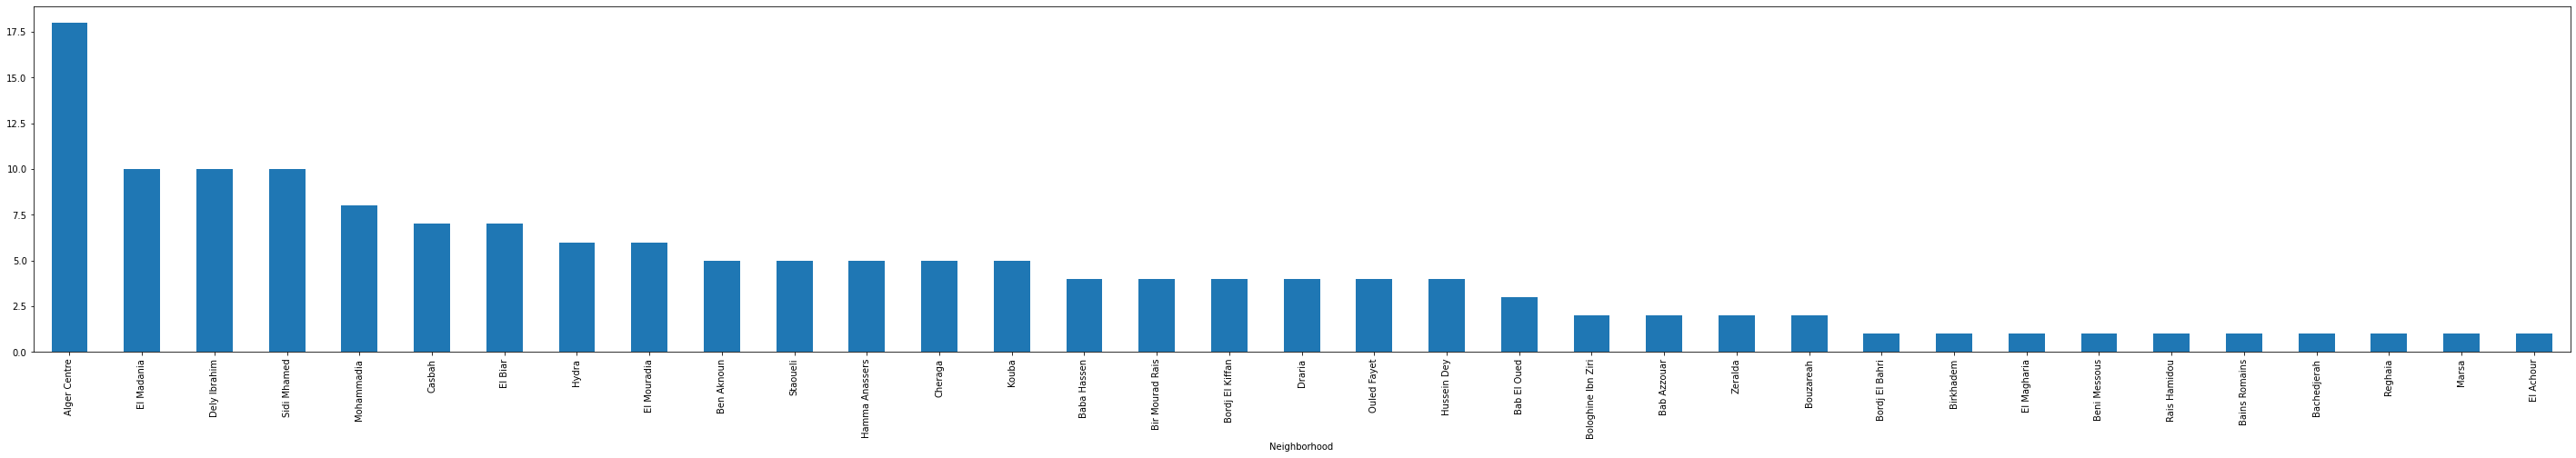

In [114]:
# Plot the number of venues in each neighborhood

alger_venues.groupby(alger_venues["Neighborhood"]).size().sort_values(ascending=False).plot(figsize=(50,7), kind="bar")

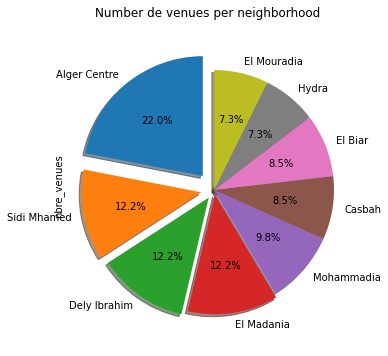

In [115]:
# Display a pie plot of the best neiborhoods in Algiers in the number of venues

df_venues = alger_venues['Neighborhood'].value_counts()
df_venues = pd.DataFrame({'Neighborhood' : df_venues.index , 'nbre_venues' : df_venues.values})
df_venues = df_venues[df_venues['nbre_venues'] > 5]

df_venues['nbre_venues'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,       # add shadow    
                            explode = (0.15,0.11,0.08,0.04, 0, 0, 0, 0, 0),
                            labels=df_venues['Neighborhood'],
                            )

plt.title('Number de venues per neighborhood')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

# **Preprocessing of the data before the clustering**

In [116]:
# one hot encoding
alger_onehot = pd.get_dummies(alger_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
alger_onehot['Neighborhood'] = alger_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [alger_onehot.columns[-1]] + list(alger_onehot.columns[:-1])
alger_onehot = alger_onehot[fixed_columns]

alger_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Museum,BBQ Joint,Bar,Beach,Burger Joint,Bus Station,Cafeteria,Café,Church,Clothing Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Diner,Farm,Fast Food Restaurant,Food,French Restaurant,Furniture / Home Store,Garden,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Middle Eastern Restaurant,Nightclub,Park,Pier,Pizza Place,Plaza,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Soccer Stadium,Spa,Stadium,Tapas Restaurant,Tennis Stadium,Theater,Theme Park,Toy / Game Store,Train Station,Tree,Turkish Restaurant,Video Game Store
0,Alger Centre,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alger Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alger Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alger Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alger Centre,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# The mean of existence of each venues categeory in each neighborhood

alger_grouped = alger_onehot.groupby('Neighborhood').mean().reset_index()
alger_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Art Museum,BBQ Joint,Bar,Beach,Burger Joint,Bus Station,Cafeteria,Café,Church,Clothing Store,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Diner,Farm,Fast Food Restaurant,Food,French Restaurant,Furniture / Home Store,Garden,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Middle Eastern Restaurant,Nightclub,Park,Pier,Pizza Place,Plaza,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Soccer Stadium,Spa,Stadium,Tapas Restaurant,Tennis Stadium,Theater,Theme Park,Toy / Game Store,Train Station,Tree,Turkish Restaurant,Video Game Store
0,Alger Centre,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.055556,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.166667,0.0,0.0,0.055556,0.055556,0.0,0.0,0.055556,0.00,0.0,0.000000,0.055556,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bab Azzouar,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bab El Oued,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.333333,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Baba Hassen,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.25,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bachedjerah,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Define a function for top venues for a neighborhood
num_top_venues=10
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [151]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
alger_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
alger_neighborhoods_venues_sorted['Neighborhood'] = alger_grouped['Neighborhood']

for ind in np.arange(alger_grouped.shape[0]):
    alger_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alger_grouped.iloc[ind, :], num_top_venues)

alger_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alger Centre,Hotel,Café,Restaurant,Historic Site,Italian Restaurant,Lounge,French Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Pier
1,Bab Azzouar,Hotel,Halal Restaurant,Cosmetics Shop,Harbor / Marina,Gym / Fitness Center,Gym,Garden,Furniture / Home Store,French Restaurant,Food
2,Bab El Oued,Fast Food Restaurant,Park,Plaza,Video Game Store,Historic Site,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
3,Baba Hassen,Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Construction & Landscaping,Cosmetics Shop,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
4,Bachedjerah,Bus Station,Video Game Store,Cosmetics Shop,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store,French Restaurant


# **The clustering of neighborhoods**

In [0]:
# for each value of k, we can initialise k_means and use inertia 
# to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
alger_grouped_clustering = alger_grouped.drop('Neighborhood', 1)
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    alger_kmeans = k_means.fit(alger_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

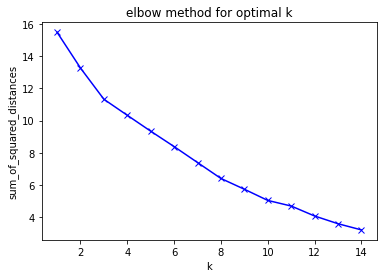

In [153]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [154]:
# set number of clusters
kclusters = 9

alger_grouped_clustering = alger_grouped.drop('Neighborhood', 1)

# run k-means clustering
alger_kmeans = KMeans(n_clusters=kclusters).fit(alger_grouped_clustering)

# check cluster labels generated for each row in the dataframe
alger_kmeans.labels_[0:10]

array([2, 0, 2, 2, 4, 1, 2, 5, 2, 8], dtype=int32)

In [155]:
# add clustering labels
alger_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', alger_kmeans.labels_)

Alger_neighborhoods_clustered = Alger_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Alger_neighborhoods_clustered = Alger_neighborhoods_clustered.join(alger_neighborhoods_venues_sorted.set_index('Neighborhood'), on='nom')
Alger_neighborhoods_clustered = Alger_neighborhoods_clustered.dropna().reset_index(drop=True)

Alger_neighborhoods_clustered.head() # check the last columns!

,nom,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alger Centre,36.772484,3.055116,2.0,Hotel,Café,Restaurant,Historic Site,Italian Restaurant,Lounge,French Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Pier
1,Sidi Mhamed,36.753768,3.058756,2.0,French Restaurant,Hotel,Stadium,Gym,Furniture / Home Store,Market,Harbor / Marina,Restaurant,Train Station,Burger Joint
2,El Madania,36.741179,3.068890,2.0,Restaurant,Plaza,Bar,Nightclub,French Restaurant,Lounge,History Museum,Garden,Furniture / Home Store,Cosmetics Shop
3,Hamma Anassers,36.750963,3.078123,0.0,Hotel,Tree,American Restaurant,Park,Cosmetics Shop,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
4,Bab El Oued,36.792759,3.051360,2.0,Fast Food Restaurant,Park,Plaza,Video Game Store,Historic Site,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store


In [101]:
# Get the latitude and longitude of Algiers using Nominatim

address = 'Algiers'

geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Algiers are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Algiers are 36.7753606, 3.0601882.


# **Display the clusters in the map using folium**

In [156]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Alger_neighborhoods_clustered['latitude'], Alger_neighborhoods_clustered['longitude'], Alger_neighborhoods_clustered['nom'], Alger_neighborhoods_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [157]:
Alger_neighborhoods_clustered.loc[Alger_neighborhoods_clustered['Cluster Labels'] == 2]

,nom,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alger Centre,36.772484,3.055116,2.0,Hotel,Café,Restaurant,Historic Site,Italian Restaurant,Lounge,French Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Pier
1,Sidi Mhamed,36.753768,3.058756,2.0,French Restaurant,Hotel,Stadium,Gym,Furniture / Home Store,Market,Harbor / Marina,Restaurant,Train Station,Burger Joint
2,El Madania,36.741179,3.068890,2.0,Restaurant,Plaza,Bar,Nightclub,French Restaurant,Lounge,History Museum,Garden,Furniture / Home Store,Cosmetics Shop
4,Bab El Oued,36.792759,3.051360,2.0,Fast Food Restaurant,Park,Plaza,Video Game Store,Historic Site,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
6,Casbah,36.784496,3.058872,2.0,Hotel,Plaza,Art Museum,Historic Site,Theater,Seafood Restaurant,Café,Food,Farm,Fast Food Restaurant
7,Bir Mourad Rais,36.735349,3.050374,2.0,Hotel,Burger Joint,Café,Historic Site,BBQ Joint,Diner,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym
8,El Biar,36.769009,3.030995,2.0,Pizza Place,Video Game Store,Furniture / Home Store,Bus Station,Stadium,Tapas Restaurant,Garden,French Restaurant,Gym,Gym / Fitness Center
9,Bouzareah,36.781638,3.012567,2.0,Martial Arts Dojo,Cafeteria,Video Game Store,Cupcake Shop,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
12,Kouba,36.726673,3.081495,2.0,Café,Toy / Game Store,Sandwich Place,Cupcake Shop,Video Game Store,Cosmetics Shop,Halal Restaurant,Gym / Fitness Center,Gym,Garden
15,Ben Aknoun,36.757481,3.010066,2.0,Mediterranean Restaurant,Indian Restaurant,Café,Tennis Stadium,Soccer Stadium,Video Game Store,Diner,Farm,Fast Food Restaurant,French Restaurant


In [159]:
Alger_neighborhoods_clustered.loc[Alger_neighborhoods_clustered['Cluster Labels'] == 1]

,nom,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Bologhine Ibn Ziri,36.803713,3.043340,1.0,Beach,Church,Video Game Store,Cupcake Shop,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
17,Bains Romains,36.816204,3.001936,1.0,Beach,Video Game Store,Cosmetics Shop,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store,French Restaurant
18,Rais Hamidou,36.811293,3.010066,1.0,Beach,Video Game Store,Cosmetics Shop,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store,French Restaurant
29,Zeralda,36.694615,2.827796,1.0,Turkish Restaurant,Beach,Cupcake Shop,Historic Site,Harbor / Marina,Halal Restaurant,Gym / Fitness Center,Gym,Garden,Furniture / Home Store
